In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_style("whitegrid")

In [2]:
df=pd.read_csv("/home/lucas/Downloads/HIST_PAINEL_COVIDBR_24fev2021.csv", sep=';')

In [3]:
df['data']=pd.to_datetime(df['data'])

In [4]:
municipio='Salvador'
df=df[df['municipio']==municipio]

In [5]:
df.set_index('data', inplace=True)

In [6]:
settings=[(0,0,'casosNovos','Casos Novos'),(0,1,'casosAcumulado','Casos Acumulados'),
(1,0,'obitosNovos','Óbitos Novos'), (1,1,'obitosAcumulado','Óbitos Acumulados')]

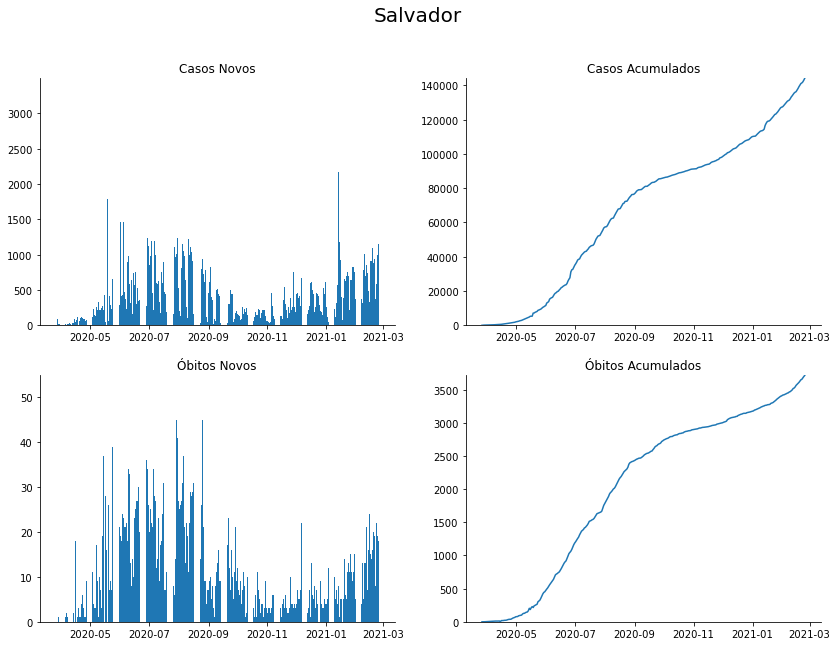

In [7]:
fig, ax=plt.subplots(2,2, figsize=(14,10))

for i, tup in enumerate(settings):
    if i%2==0:
        ax[tup[0],tup[1]].bar(x=df.index,height=df[tup[2]])
    else:
        ax[tup[0],tup[1]].plot(df[tup[2]])
    ax[tup[0],tup[1]].spines['right'].set_visible(False)
    ax[tup[0],tup[1]].spines['top'].set_visible(False)
    ax[tup[0],tup[1]].set_title(tup[3])
    ax[tup[0],tup[1]].set_ylim(0,np.max(df[tup[2]])+10)

fig.suptitle(municipio, fontsize=20)

plt.show()

In [8]:
df['death_case_ratio']=100*df['obitosNovos']/df['casosNovos']
# df['death_case_ratio']=df['obitosAcumulado']/df['casosAcumulado']

In [9]:
np.mean(df['death_case_ratio'])

5.300439306926607

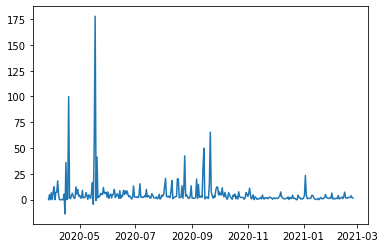

In [10]:
plt.plot(df['death_case_ratio'])